In [24]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
import matplotlib.pyplot as plt

In [26]:
batch_size = 32
IMG_HEIGHT = 120
IMG_WIDTH = 160
epochs = 3
path = "data/data"

image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [27]:
train_data_gen = image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=path,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary',
                                                           subset="training")

Found 13524 images belonging to 2 classes.


In [28]:
test_data_gen = image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=path,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary',
                                                           subset="validation")

Found 3381 images belonging to 2 classes.


In [30]:
model = Sequential([
    Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH , 3)),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=13524 // batch_size,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=3381 // batch_size
)

model.save("second.h5")

Epoch 1/3
422/422 [==============================] - 66s 157ms/step - loss: 2.1040 - accuracy: 0.5213 - val_loss: 0.6922 - val_accuracy: 0.5280
Epoch 2/3
422/422 [==============================] - 60s 143ms/step - loss: 0.6919 - accuracy: 0.5264 - val_loss: 0.6916 - val_accuracy: 0.5280
Epoch 3/3
422/422 [==============================] - 61s 145ms/step - loss: 0.6918 - accuracy: 0.5262 - val_loss: 0.6916 - val_accuracy: 0.5280


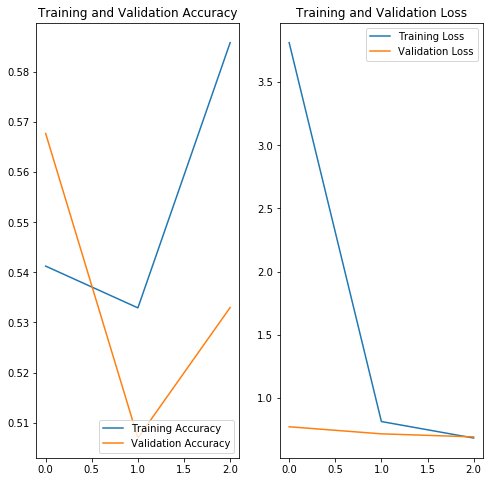

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()